In [42]:
import sys
sys.path.append(r'C:\Users\rwahe\JupyterCodes\Networks\pyrtrack')
import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt
from skimage import io
from pyrtrack.finders import MultiscaleBlobFinder, get_deconv_kernel, deconvolve
from pyrtrack import rescale
%matplotlib inline

Quick functions

In [2]:
def draw_circles(xs, ys, rs, **kwargs):
    for x,y,r in zip(xs,ys,rs):
        circle = plt.Circle((x,y), radius=r, **kwargs)
        plt.gca().add_patch(circle)
        
def display_cuts(imf, centers, X=30, Y=25, Z=30):
    """Draw three orthogonal cuts with corresponding centers"""
    plt.subplot(1,3,1);
    draw_circles(centers[:,0], centers[:,1], centers[:,-2], facecolor='none', edgecolor='g')
    plt.imshow(imf[Z], 'hot',vmin=0,vmax=255);
    plt.subplot(1,3,2);
    draw_circles(centers[:,0], centers[:,2], centers[:,-2], facecolor='none', edgecolor='g')
    plt.imshow(imf[:,Y], 'hot',vmin=0,vmax=255);
    plt.subplot(1,3,3);
    draw_circles(centers[:,1], centers[:,2], centers[:,-2], facecolor='none', edgecolor='g')
    plt.imshow(imf[:,:,X], 'hot',vmin=0,vmax=255);

Load image

(287, 512, 512)


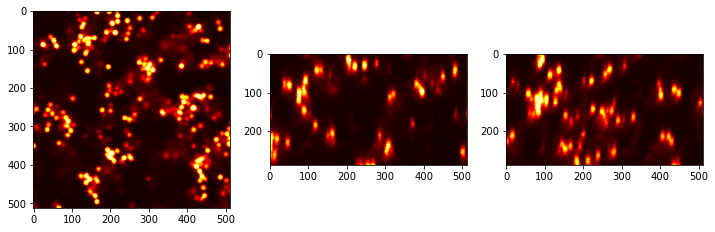

In [61]:
#imf = np.fromfile(r"C:\Users\Rony\Downloads\230223_bidisperse_gel_c_2.25.lif - 60minz1 - C=0.tif", dtype=np.uint8).reshape((287,512,512))
#imf = io.imread(r"C:\Users\Rony\Downloads\230223_bidisperse_gel_c_2.25.lif - 60minz1 - C=0.tif")
imf = io.imread(r"C:\Users\rwahe\Downloads\230223_bidisperse_gel_c_2.25.lif - 60minz1 - C=1.tif")
print(np.shape(imf))
fig = plt.figure(figsize=(12,6))
plt.subplot(1,3,1).imshow(imf[30], 'hot',vmin=0,vmax=255);
plt.subplot(1,3,2).imshow(imf[:,25], 'hot',vmin=0,vmax=255);
plt.subplot(1,3,3).imshow(imf[:,:,30], 'hot',vmin=0,vmax=255);

In [62]:
finder = MultiscaleBlobFinder(imf.shape, Octave0=False, nbOctaves=4)

(1618, 5)
smallest particle detected has a radius of 3.88581 px


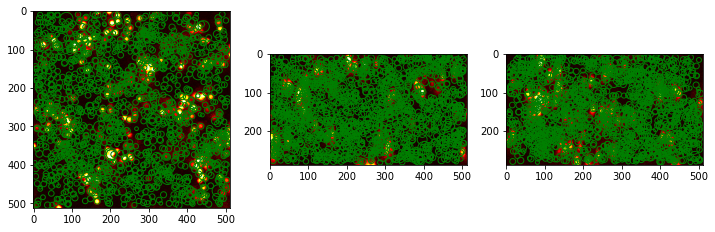

In [63]:
centers = finder(imf)
print(centers.shape)
print(f"smallest particle detected has a radius of {centers[:,-2].min():g} px")
fig = plt.figure(figsize=(12,6))
display_cuts(imf, centers)

(1631, 5)
smallest particle detected has a radius of 4.45859 px


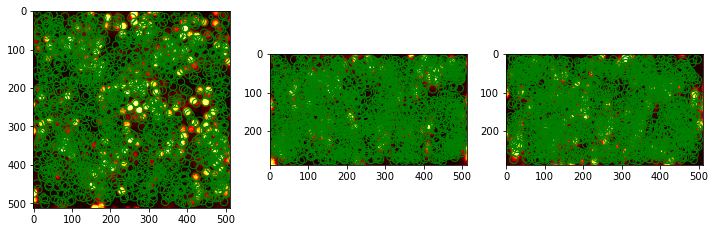

In [6]:
centers = finder(imf, removeOverlap=False)
print(centers.shape)
print(f"smallest particle detected has a radius of {centers[:,-2].min():g} px")
fig = plt.figure(figsize=(12,6))
display_cuts(imf, centers)

x,y,z,r,i
[[ 2.04012708e+02  2.81666646e+01  1.39907635e+01  8.62520886e+00
  -1.61686899e+01]
 [ 1.26209308e+02  1.76312686e+02  2.00179645e+02  7.64937051e+00
  -1.61681220e+01]
 [ 2.63439485e+02  2.58384227e+02  9.83706044e+00  8.53774109e+00
  -1.58655010e+01]
 ...
 [ 4.33156391e+02  2.68692466e+02  1.62839836e+02  4.93148424e+00
  -4.17534912e-02]
 [ 2.96759815e+01  3.06499375e+01  7.89225679e+00  6.03947378e+00
  -3.66731411e-02]
 [ 3.93720795e+02  2.44113395e+02  1.87560239e+02  6.02242172e+00
  -1.54312961e-02]]
[8.62520886 7.64937051 8.53774109 ... 4.93148424 6.03947378 6.02242172]
(1352, 5) [[204.01270762  28.16666457  13.99076354   8.62520886 -16.16868991]
 [126.20930763 176.31268599 200.17964533   7.64937051 -16.16812201]
 [263.43948509 258.38422719   9.83706044   8.53774109 -15.865501  ]
 ...
 [386.26280732 276.20214032  52.04232651   6.39830938  -7.05741847]
 [311.31137639  64.89825746 147.89006961   6.48478279  -7.05499972]
 [120.42113345 407.23860472 269.11411826   6.24

(array([[  0.,   0.,   0.,   0.,   0.,   1.,   0.,   4.,   2.,  71.],
        [  0.,   1.,  18.,  78.,  88.,  27.,   1.,   0.,   0.,  87.],
        [ 14., 103., 279., 406., 215.,  13.,   0.,   0.,   0.,  42.],
        [ 10.,  22.,  23.,   9.,   1.,   0.,   0.,   0.,   0.,  43.],
        [  1.,   3.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,  14.],
        [  0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  1.,   5.,   8.,   4.,   1.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   2.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  1.,   1.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 3.88580729,  5.33854589,  6.7912845 ,  8.24402311,  9.69676172,
        11.14950033, 12.60223893, 14.05497754, 15.50771615, 16.96045476,
        18.41319337]),
 array([-1.61686899e+01, -1.45533641e+01, -1.29380382e+01, -1.13227123e+01,
        -9.70738647e+00, -8.09206060e+00, -6.47673474

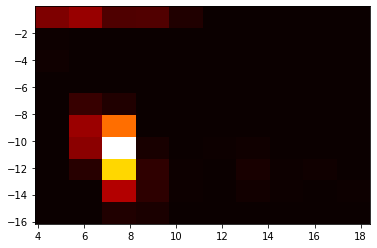

In [67]:
print('x,y,z,r,i') # i is particle brightness
print(centers)
print(centers[:,3])
centers2 = centers[centers[:,4] < -7]
print(np.shape(centers2),
     centers2)
plt.hist2d(centers[:,3],centers[:,4],cmap='hot')

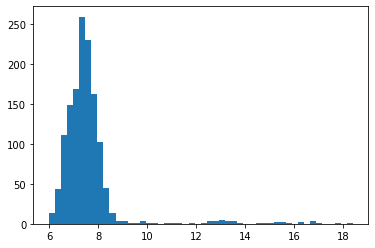

In [65]:
plt.hist(centers2[:,3],bins=50)
plt.show()

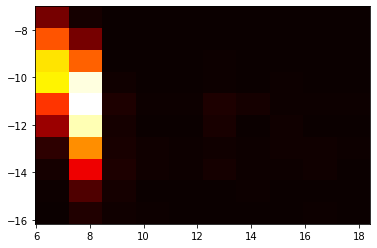

In [66]:
plt.hist2d(centers2[:,3],centers2[:,4],cmap='hot')
plt.show()


In [68]:
PIXEL_SIZE = 0.070 # nm
centers3 = [[i*PIXEL_SIZE for i in p] for p in centers2]
print(np.shape(centers3))

(1352, 5)


In [69]:
df = pd.DataFrame(centers3,columns=['x','y','z','r','i']).drop('i',axis=1)
#my_new_list = [[[z * -1 for z in y] for y in x] for x in my_list]

df.to_csv(r"C:\Users\rwahe\Downloads\nr_test_run.csv")

In [ ]:
def run_notebook(img):
    finder = MultiscaleBlobFinder(imf.shape, Octave0=False, nbOctaves=4)
    centers = finder(imf)
    print(centers.shape)
    print(f"smallest particle detected has a radius of {centers[:,-2].min():g} px")


In [ ]:
plt.subplot(1,3,1).imshow(imf[30], 'hot',vmin=0,vmax=255);
plt.subplot(1,3,2).imshow(imf[:,25], 'hot',vmin=0,vmax=255);
plt.subplot(1,3,3).imshow(imf[:,:,30], 'hot',vmin=0,vmax=255);